In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función de Predicción

$h(x_i) = x_i \cdot w^t $

$h(X) = XW^t$ 

In [131]:
def h(X, W):
    return np.dot(X, W)

# Loss Function

$\mathcal{L} = ||y - h(X)||_2^2$

$\mathcal{L} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In [132]:
def loss(Y, Y_aprox):
    return np.sum((Y - Y_aprox)**2)

# Derivadas

$ \frac{\partial \mathcal{L}}{\partial W} = 2(y - h(X))^T \cdot - X $

$ \frac{\partial \mathcal{L}}{\partial W} = 2(y - h(X))^T \cdot - X $

In [133]:
def derivates(Y, Y_aprox, X):
    return 2 * np.dot( (Y_aprox - Y).T,X)

# Actualización pesos

In [134]:
def update(W, alpha, dW):
    return W - alpha * dW

In [135]:
def train(X, Y, epochs, alfa):
    W = np.random.randn(X.shape[1])*0.01
    loss_values = []
    for i in range(epochs):
        Y_aprox = h(X, W)
        dW = derivates(Y, Y_aprox, X)
        W = update(W,alfa, dW)
        L = loss(Y, Y_aprox)
        loss_values.append(L)
        if ((i%1000)==0):
          print("loss value error :" + str(L))
    return W, loss_values

In [136]:
d_train =  pd.read_csv("train_final.csv")


In [137]:
tipos_unicos = d_train['TIPO_PROD_PROY'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_train['TIPO_PROD_PROY_NUM'] = d_train['TIPO_PROD_PROY'].map(mapeo)

print(d_train['TIPO_PROD_PROY_NUM'].unique())
print(tipos_unicos)

[1 2]
['3.PRODUCTO' '2.PROYECTO']


In [138]:
tipos_unicos = d_train['TIPO_ACT_OBRA_ACCINV'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_train['TIPO_ACT_OBRA_ACCINV_NUM'] = d_train['TIPO_ACT_OBRA_ACCINV'].map(mapeo)

print(d_train['TIPO_ACT_OBRA_ACCINV_NUM'].unique())
print(tipos_unicos)

[1 2]
['5.ACTIVIDAD' '6.ACCION DE INVERSION']


In [139]:
tipos_unicos = d_train['CATEGORIA_GASTO'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_train['CATEGORIA_GASTO_NUM'] = d_train['CATEGORIA_GASTO'].map(mapeo)

print(d_train['CATEGORIA_GASTO_NUM'].unique())
print(tipos_unicos)

[1 2]
['5.GASTOS CORRIENTES' '6.GASTOS DE CAPITAL']


In [140]:
# columnas_seleccionadas = ['TIPO_PROD_PROY_NUM', 'TIPO_ACT_OBRA_ACCINV_NUM', 'META','CANT_META_ANUAL','CANT_META_SEM','AVAN_FISICO_ANUAL',
#                           'AVAN_FISICO_SEM','SEC_FUNC','CATEGORIA_GASTO_NUM','MTO_PIA']

columnas_seleccionadas = [  'META',
                          'AVAN_FISICO_SEM','MTO_PIA']
                          

# Crear un nuevo DataFrame con las columnas seleccionadas
d_train_f = d_train[columnas_seleccionadas].copy()
d_train_f

,META,AVAN_FISICO_SEM,MTO_PIA
0,6,6,0
1,20,6,805
2,4,16,0
3,1,6,0
4,7,6,8816
...,...,...,...
1459,21,0,12779
1460,17,0,180
1461,3,0,31447
1462,19,0,2250


In [141]:
def min_max_normalize_df(df):
    df_normalized = df.copy()  
    for col in df.columns:
        maxval = df[col].max()
        minval = df[col].min()
        if maxval != minval:
            df_normalized[col] = (df[col] - minval) / (maxval - minval)
    return df_normalized

In [142]:

d_train_n = min_max_normalize_df(d_train_f)

x_train_n = d_train_n.iloc[:, :-1]
y_train_n = d_train_n.iloc[:, -1]




In [143]:
alfa = 0.05
umbral = 10000  # Número de épocas

# x_train_n = x_train_n.to_numpy()
# y_train_n = y_train_n.to_numpy()

# Entrenar el modelo
W, loss_values = train(x_train_n, y_train_n, umbral, alfa)  # Asegúrate de que lamda esté definido

# Mostrar el promedio del error cuadrático medio
avg_mse = np.mean(loss_values)
print("avg_mse: ", avg_mse)

loss value error :6.666180335478758
loss value error :0.0
loss value error :0.0
loss value error :0.0
loss value error :0.0
loss value error :0.0
loss value error :0.0
loss value error :0.0
loss value error :0.0
loss value error :0.0
avg_mse:  inf


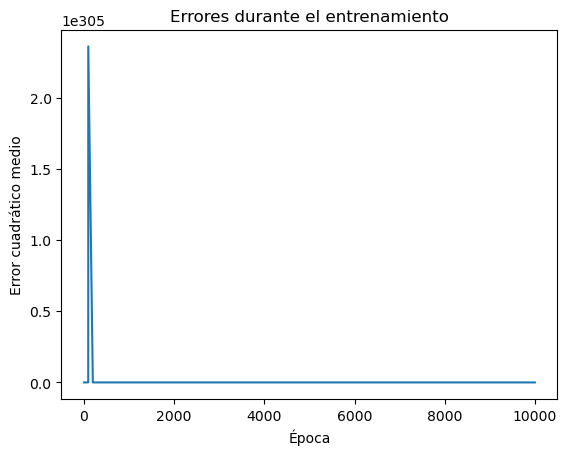

In [144]:
data = {'Época': range(len(loss_values)), 'Error cuadrático medio': loss_values}
df_loss = pd.DataFrame(data)

# Graficar los errores durante el entrenamiento con Seaborn
sns.lineplot(data=df_loss, x='Época', y='Error cuadrático medio')
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
plt.title('Errores durante el entrenamiento')
plt.show()

In [145]:
d_test =  pd.read_csv("test_final.csv")

In [146]:
tipos_unicos = d_test['TIPO_PROD_PROY'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_test['TIPO_PROD_PROY_NUM'] = d_test['TIPO_PROD_PROY'].map(mapeo)

print(d_test['TIPO_PROD_PROY_NUM'].unique())
print(tipos_unicos)

[1 2]
['3.PRODUCTO' '2.PROYECTO']


In [147]:
tipos_unicos = d_test['TIPO_ACT_OBRA_ACCINV'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_test['TIPO_ACT_OBRA_ACCINV_NUM'] = d_test['TIPO_ACT_OBRA_ACCINV'].map(mapeo)

print(d_test['TIPO_ACT_OBRA_ACCINV_NUM'].unique())
print(tipos_unicos)

[1 2]
['5.ACTIVIDAD' '6.ACCION DE INVERSION']


In [148]:
tipos_unicos = d_test['CATEGORIA_GASTO'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_test['CATEGORIA_GASTO_NUM'] = d_test['CATEGORIA_GASTO'].map(mapeo)

print(d_test['CATEGORIA_GASTO_NUM'].unique())
print(tipos_unicos)

[1 2]
['5.GASTOS CORRIENTES' '6.GASTOS DE CAPITAL']


In [149]:
# columnas_seleccionadas = ['TIPO_PROD_PROY_NUM', 'TIPO_ACT_OBRA_ACCINV_NUM', 'META','CANT_META_ANUAL','CANT_META_SEM','AVAN_FISICO_ANUAL',
#                           'AVAN_FISICO_SEM','SEC_FUNC','CATEGORIA_GASTO_NUM']
columnas_seleccionadas = [  'META',
                          'AVAN_FISICO_SEM']
                          

# Crear un nuevo DataFrame con las columnas seleccionadas
d_test_f = d_test[columnas_seleccionadas].copy()
d_test_f

,META,AVAN_FISICO_SEM
0,5,0
1,11,0
2,8,0
3,8,0
4,5,0
...,...,...
9610,1,0
9611,3,0
9612,4,0
9613,4,0


In [150]:

d_test_n = min_max_normalize_df(d_test_f)



mse = h(d_test_n,W)
mse = np.array(mse)

print(mse)

[nan nan nan ... nan nan nan]
